### 加入套件

In [2]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

### 取得證交所上市公司個股日成交資訊

In [3]:
# "青松健康"股票代號
stock_id = '6931'

# # 獲取今天的日期（型別：str）
# date = dt.date.today().strftime("%Y%m%d")
# print('今日日期：', date)

# 獲取8月份的資料
date = "20250831"

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],columns=json_data['fields'])

df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/08/01,"38,914","1,952,653",50.30,50.40,50.00,50.40,+0.10,52
1,114/08/04,"14,549","732,342",50.40,50.40,50.20,50.20,-0.20,78
2,114/08/05,"34,791","1,744,470",50.20,50.30,50.00,50.20,0.00,68
3,114/08/06,"31,730","1,587,894",50.10,50.20,50.00,50.00,-0.20,41
4,114/08/07,"27,705","1,390,662",50.10,50.30,50.00,50.30,+0.30,47
5,114/08/08,"35,531","1,782,605",50.30,50.40,50.00,50.40,+0.10,92
6,114/08/11,"43,987","2,200,808",50.10,50.40,49.95,50.00,-0.40,81
7,114/08/12,"48,757","2,438,455",50.10,50.10,49.90,50.00,0.00,35
8,114/08/13,"36,690","1,833,925",50.00,50.20,49.75,50.10,+0.10,61
9,114/08/14,"53,448","2,685,916",50.10,50.90,49.90,50.40,+0.30,63


### 抓取特定某段時間區間 9/10~9/15
為了比較時間區間，必須要把「日期」欄位轉圜為 Pandas 中的 datetime 格式

In [ ]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/09/01'
end_date = '2025/09/07'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

          日期    成交股數       成交金額    開盤價    最高價    最低價    收盤價   漲跌價差 成交筆數
0 2025-09-01  37,648  1,840,875  49.50  49.50  48.50  48.60  -0.90  152
1 2025-09-02  28,500  1,390,415  48.55  49.40  48.55  49.40  +0.80   42
2 2025-09-03  52,068  2,573,177  49.40  50.00  48.40  50.00  +0.60   67
3 2025-09-04  27,370  1,359,479  49.10  50.00  49.10  49.90  -0.10   28
4 2025-09-05  14,374    713,297  49.25  49.90  49.25  49.60  -0.30   24


### 取得連續月份資料
以個股本益比為例

In [ ]:
# 設定查找時間
date_list = ['20250701', '20250801', '20250901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   114年07月01日   0.92   113  85.08  3.13  114/1
1   114年07月02日   0.92   113  85.74  3.16  114/1
2   114年07月03日   0.93   113  84.43  3.11  114/1
3   114年07月04日   0.94   113  83.93  3.09  114/1
4   114年07月07日   0.93   113  84.59  3.11  114/1
5   114年07月08日   0.95   113  82.95  3.05  114/1
6   114年07月09日   0.96   113  82.30  3.03  114/1
7   114年07月10日   0.95   113  82.46  3.04  114/1
8   114年07月11日   0.94   113  83.61  3.08  114/1
9   114年07月14日   0.94   113  83.61  3.08  114/1
10  114年07月15日   0.95   113  83.11  3.06  114/1
11  114年07月16日   0.94   113  83.77  3.08  114/1
12  114年07月17日   0.92   113  85.25  3.14  114/1
13  114年07月18日   0.92   113  85.08  3.13  114/1
14  114年07月21日   0.94   113  83.61  3.08  114/1
15  114年07月22日   0.93   113  84.43  3.11  114/1
16  114年07月23日   0.94   113  83.77  3.08  114/1
17  114年07月24日   0.94   113  83.61  3.08  114/1
18  114年07月25日   0.95   113  82.62  3.04  114/1
19  114年07月28日   0.95   113  82.62  3.04

## 使用 Yahoo Finance 取得資料

###匯入套件

In [ ]:
!pip install yfinance

In [4]:
# yahoo finance 套件
import yfinance as yf
# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [5]:
# 輸入股票代號
stock_id = "6931.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-540551493.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-19,69.432381,70.323811,69.333335,70.323811,42050
1,2025-03-20,70.323807,70.323807,69.432377,69.828569,58100
2,2025-03-21,69.630478,70.918092,69.630478,70.323808,28011
3,2025-03-24,69.432381,69.828573,69.234288,69.828573,63055
4,2025-03-25,69.729523,70.026661,69.333331,69.630477,60010
...,...,...,...,...,...,...
118,2025-09-08,51.500000,51.599998,49.700001,49.700001,119000
119,2025-09-09,53.200001,54.000000,52.099998,52.099998,186048
120,2025-09-10,52.000000,53.299999,51.599998,53.299999,102050
121,2025-09-11,50.200001,52.000000,50.200001,52.000000,60000


# <b>資料可視化</b>

## 可視化收盤價折線圖

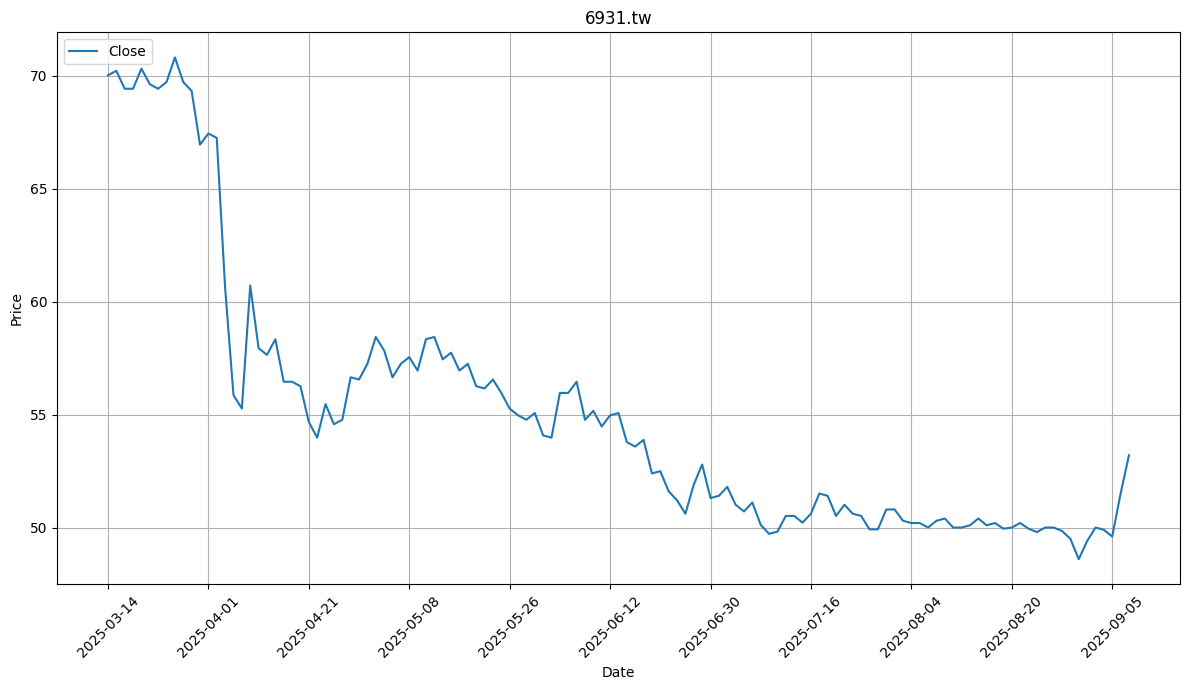

In [ ]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 用 BeautifulSoup4 取得 Yahoo 股市資料

### ⚠️ 如果過度頻繁爬取證交所的資料(約連續50次)會被偵測並封鎖IP，可以搭配time、sleep延遲回應避免被認為是機器人程式。

###匯入套件

In [ ]:
# 用來處理時間
from datetime import datetime, timedelta
# 解析網頁內容
from bs4 import BeautifulSoup

### 取得股價資料

In [ ]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# "青松健康"股票代號
stock_id = '6931'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2025/09/10 13:30,6931,52.0,53.3,53.3,51.6,52.4,0.054,53.2,2.26%,1.20,102,186,3.20%


###取得季報表資訊


In [ ]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '6931', 'income-statement']
income-statement


In [ ]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

NameError: name 'BeautifulSoup' is not defined